# Kernal & Imports

In [52]:
#Stop kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [53]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [54]:
# Loads array of train axial 0000.npy
axial0000 = np.load(r'/Users/emilytsui/Downloads/MRnet-v1.0/train/axial/0000.npy')

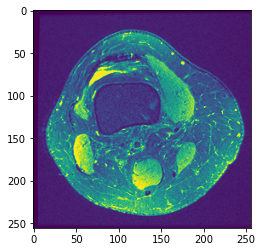

In [55]:
# Visualize np array, axial 0000
imgplot = plt.imshow(axial0000[9])

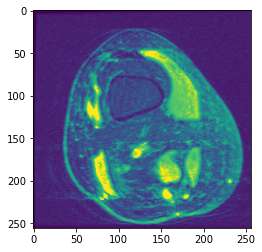

In [56]:
# Visualize axial 1152 array
imgplot1 = plt.imshow(np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/1152.npy')[0])

# Data Loading MRNet-v1.0

In [57]:
# LOADING DATA
train_data = []
test_data = []

In [58]:
for x in os.listdir(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/axial/'):
    try:
        train_data.append([np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/axial/'+x)[0]/255,
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/coronal/'+x)[0]/255,
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/sagittal/'+x)[0]/255])
    except:
        print(x)
        
for x in os.listdir(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/'):
    try:
        test_data.append([np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/'+x)[0]/255,
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/coronal/'+x)[0]/255,
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/sagittal/'+x)[0]/255])
    except:
        print(x)

.DS_Store


In [59]:
np.array(train_data).shape

(1130, 3, 256, 256)

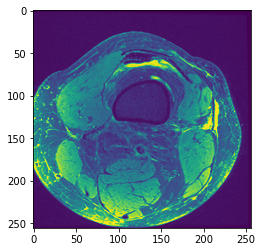

In [60]:
plt.imshow(train_data[1129][0])

In [61]:
train_data

[[array([[0.01176471, 0.01176471, 0.01176471, ..., 0.        , 0.        ,
          0.        ],
         [0.03137255, 0.03137255, 0.02352941, ..., 0.        , 0.        ,
          0.        ],
         [0.05490196, 0.04705882, 0.03921569, ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.02352941, 0.05490196, 0.05490196, ..., 0.        , 0.        ,
          0.        ],
         [0.02352941, 0.04313725, 0.03529412, ..., 0.        , 0.        ,
          0.        ],
         [0.01176471, 0.01960784, 0.01960784, ..., 0.        , 0.        ,
          0.        ]]),
  array([[0.        , 0.00392157, 0.00392157, ..., 0.        , 0.        ,
          0.        ],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
          0.        ],
         [0.00392157, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.        , 0.00784314, ..., 0.        , 0.        ,
          0. 

# Loading MRNet v1.0 Labels

In [62]:
# LOADING LABELS FROM CSV
train_ab_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-abnormal.csv', index_col=0)
train_acl_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_meni_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-meniscus.csv', index_col=0)
test_ab_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-abnormal.csv', index_col=0)
test_acl_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-acl.csv', index_col=0)
test_meni_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-meniscus.csv', index_col=0)

In [63]:
train_labels = [[1,0,0]]
test_labels = [[0,0,0]]

In [64]:
for x in range(1129):
  train_labels.append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
for x in range(119):
  test_labels.append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])

In [65]:
train_labels[:3], test_labels[:3]

([[1, 0, 0], [1, 1, 1], [1, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]])

In [66]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [67]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [68]:
train_data.shape,train_labels.shape

((1130, 3, 256, 256), (1130, 3))

# Data Loading kneeMRI Dataset

Column names:
('examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth', 'volumeFilename')

Shape of volume "/Users/emilytsui/Downloads/volumetric_data/vol02/502889-5.pck": (30, 320, 320)


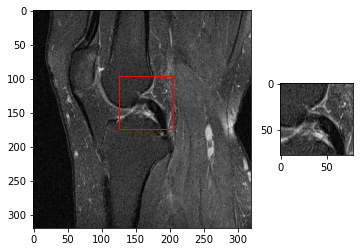

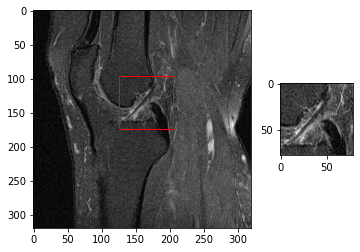

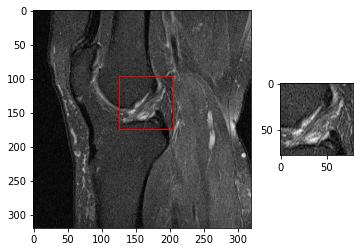

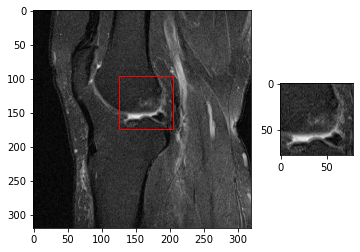


Shape of volume "/Users/emilytsui/Downloads/volumetric_data/vol02/502889-8.pck": (30, 320, 320)


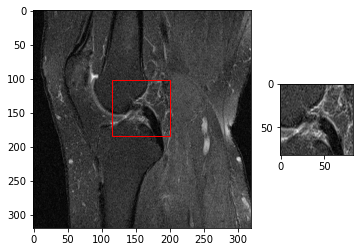

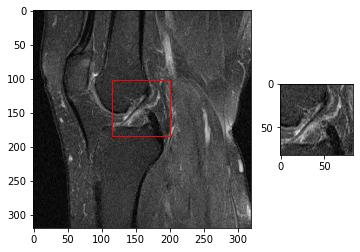

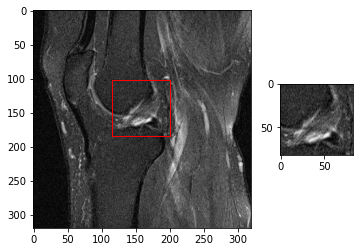

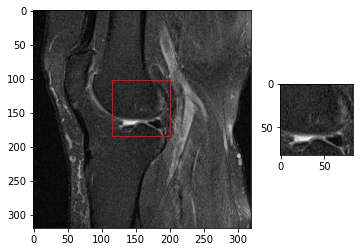

In [85]:
import pickle
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# directory where the volumetric data is located
volumetric_data_dir = '/Users/emilytsui/Downloads/volumetric_data/vol02'

# path to metadata csv file
metadata_csv_path = '/Users/emilytsui/Downloads/metadata.csv'

# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True, 
    dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20') 

print('Column names:')
print(metadata.dtype.names)

# Select all rows where examID == 502889
exams = metadata[metadata['examId'] == 502889]

for exam in exams:
    vol_data_file = exam['volumeFilename']

    vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

    # Load data from file
    with open(vol_data_path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        volumetric_data = pickle.load(file_handler)
    
    print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)
    
    # Get all roi slices from volume
    z_start = exam['roiZ']
    depth = exam['roiDepth']
    
    for z in range(z_start, z_start + depth):
    
        slice = volumetric_data[z, :, :]
        
        # Get roi dimensions
        x, y, w, h = [exam[attr] for attr in ['roiX', 'roiY', 'roiWidth', 'roiHeight']]
        
        # Extract ROI
        roi = slice[y:y+h, x:x+w]
        
        # Plot slice and roi
        figure = plt.figure()
        plot = plt.subplot2grid((1, 4), (0, 0), 1, 3) # This makes the slice plot larger than roi plot
        plot.add_patch(patch.Rectangle((x, y), w, h, fill=None, color='red'))
        plot.imshow(slice, cmap='gray')
        plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
        plot.imshow(roi, cmap='gray')
        
        plt.show()
        

# Model

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(3,256,256)),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(3,activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,epochs=10)

Train on 1130 samples
Epoch 1/10
1130/1130 [==============================] - 49s 43ms/sample - loss: 8.5321 - accuracy: 0.6442
Epoch 2/10
1130/1130 [==============================] - 39s 35ms/sample - loss: 1.0914 - accuracy: 0.6844
Epoch 3/10
1130/1130 [==============================] - 47s 42ms/sample - loss: 0.5627 - accuracy: 0.7445
Epoch 4/10
1130/1130 [==============================] - 43s 38ms/sample - loss: 0.5164 - accuracy: 0.7705
Epoch 5/10
1130/1130 [==============================] - 41s 37ms/sample - loss: 0.4816 - accuracy: 0.7755
Epoch 6/10
1130/1130 [==============================] - 43s 38ms/sample - loss: 0.5286 - accuracy: 0.7540
Epoch 7/10
1130/1130 [==============================] - 42s 37ms/sample - loss: 0.4917 - accuracy: 0.7761
Epoch 8/10
1130/1130 [==============================] - 45s 40ms/sample - loss: 0.4636 - accuracy: 0.7870
Epoch 9/10
1130/1130 [==============================] - 42s 37ms/sample - loss: 0.4188 - accuracy: 0.8139
Epoch 10/10
1130/1130 [=

In [75]:
model.evaluate(test_data, test_labels, verbose=2)

120/1 - 3s - loss: 0.8841 - accuracy: 0.5750


[1.389660930633545, 0.575]